## Albert Kabore


# Project Title: GHW Heart Failure Readmission Prediction 

GitHub: https://github.com/albertokabore/Albert_Project-GHW-Heart-Failure-Readmission-Prediction-

In [1371]:
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.


In [1372]:
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.


In [1373]:
!pip install --upgrade -q threadpoolctl



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importing necessary libraries


In [1374]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To suppress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations (again for consistency)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [1375]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)


In [1376]:
!pip install jinja2



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Exploratory Data Analysis (EDA)

### Loading the dataset

In [1377]:
df = pd.read_csv("GHW_HeartFailure_Readmission_Combined.csv")


### Data Overview

### Checking the shape of the dataset

In [1378]:
print(df.shape)


(1000, 22)


### Displaying the first few rows of the dataset

In [1379]:
# let's view the first 5 rows of the data

display(df.head())


,Patient_ID,Age,Gender,Ethnicity,Length_of_Stay,Previous_Admissions,Discharge_Disposition,Pulse,Temperature,Heart_Rate,Systolic_BP,Diastolic_BP,Respiratory_Rate,BUN,Creatinine,Sodium,Hemoglobin,NT_proBNP,Ejection_Fraction,Readmission_30Days,Readmission_60Days,Readmission_30or60Days
0,1,83,Male,Other,7,4,Rehab,119,37.100,147,160,99,27,11,0.610,127,13.100,2973,39,0,0,0
1,2,73,Female,Hispanic,10,2,Home,107,38.400,54,151,75,13,15,1.480,145,11.400,3220,56,0,0,0
2,3,59,Female,White,5,1,Expired,63,39.000,118,112,57,21,26,1.540,147,10.900,1190,50,0,0,0
3,4,87,Female,White,8,3,Expired,86,39.200,80,135,55,27,34,1.630,133,10.100,2934,29,1,1,1
4,5,52,Female,Asian,1,1,Home,117,38.500,94,145,79,16,32,2.570,146,12.800,4324,37,0,0,0


In [1380]:
# let's view the last 5 rows of the data
df.tail()

,Patient_ID,Age,Gender,Ethnicity,Length_of_Stay,Previous_Admissions,Discharge_Disposition,Pulse,Temperature,Heart_Rate,Systolic_BP,Diastolic_BP,Respiratory_Rate,BUN,Creatinine,Sodium,Hemoglobin,NT_proBNP,Ejection_Fraction,Readmission_30Days,Readmission_60Days,Readmission_30or60Days
995,996,79,Female,Black,5,0,Home,114,36.300,82,111,79,29,25,2.550,138,12.600,2700,43,0,1,1
996,997,65,Female,Other,8,2,Nursing Facility,80,37.400,80,146,58,17,38,2.560,143,15.300,2780,47,1,0,1
997,998,81,Female,Black,6,2,Expired,79,38.400,103,151,55,22,13,0.670,133,13.000,4470,67,0,0,0
998,999,49,Male,Other,14,4,Expired,67,36.800,93,171,74,29,34,0.930,128,15.600,4938,51,0,0,0
999,1000,63,Female,Hispanic,4,0,Home,66,36.300,83,160,68,23,24,1.280,145,12.700,185,56,0,0,0


### Checking the data types of the columns for the dataset

In [1381]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient_ID              1000 non-null   int64  
 1   Age                     1000 non-null   int64  
 2   Gender                  1000 non-null   object 
 3   Ethnicity               1000 non-null   object 
 4   Length_of_Stay          1000 non-null   int64  
 5   Previous_Admissions     1000 non-null   int64  
 6   Discharge_Disposition   1000 non-null   object 
 7   Pulse                   1000 non-null   int64  
 8   Temperature             1000 non-null   float64
 9   Heart_Rate              1000 non-null   int64  
 10  Systolic_BP             1000 non-null   int64  
 11  Diastolic_BP            1000 non-null   int64  
 12  Respiratory_Rate        1000 non-null   int64  
 13  BUN                     1000 non-null   int64  
 14  Creatinine              1000 non-null   f

### Checking for duplicate values

In [1382]:
# Duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")


Duplicate rows: 0


### Checking for missing values

In [1383]:
# Missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
print("\nMissing values:")
print(missing if not missing.empty else " No missing values")




Missing values:
 No missing values


In [1384]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

Patient_ID               0.000
Age                      0.000
Gender                   0.000
Ethnicity                0.000
Length_of_Stay           0.000
Previous_Admissions      0.000
Discharge_Disposition    0.000
Pulse                    0.000
Temperature              0.000
Heart_Rate               0.000
Systolic_BP              0.000
Diastolic_BP             0.000
Respiratory_Rate         0.000
BUN                      0.000
Creatinine               0.000
Sodium                   0.000
Hemoglobin               0.000
NT_proBNP                0.000
Ejection_Fraction        0.000
Readmission_30Days       0.000
Readmission_60Days       0.000
Readmission_30or60Days   0.000
dtype: float64

### Data Cleaning & Missing Value Handling

In [1385]:

categorical_cols = ['Gender', 'Ethnicity', 'Discharge_Disposition']
numerical_cols = ['Age', 'Length_of_Stay', 'Previous_Admissions', 'Pulse', 'Temperature',
                  'Heart_Rate', 'Systolic_BP', 'Diastolic_BP', 'Respiratory_Rate',
                  'BUN', 'Creatinine', 'Sodium', 'Hemoglobin', 'NT_proBNP', 'Ejection_Fraction']

target_col = "Readmission_30or60Days"

num_imputer = SimpleImputer(strategy="median")
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

cat_imputer = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

In [1386]:
# let's view the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_ID,1000.000,500.500,288.819,1.000,250.750,500.500,750.250,1000.000
Age,1000.000,67.000,12.946,45.000,56.000,68.000,78.000,89.000
Length_of_Stay,1000.000,7.407,4.086,1.000,4.000,7.000,11.000,14.000
Previous_Admissions,1000.000,1.948,1.429,0.000,1.000,2.000,3.000,4.000
Pulse,1000.000,84.714,20.022,50.000,67.000,85.000,102.000,119.000
Temperature,1000.000,37.715,1.001,36.000,36.800,37.700,38.600,39.500
Heart_Rate,1000.000,98.770,29.209,50.000,74.000,97.000,125.000,149.000
Systolic_BP,1000.000,135.493,25.956,90.000,112.000,136.000,159.000,179.000
Diastolic_BP,1000.000,79.289,17.348,50.000,65.000,79.000,94.250,109.000
Respiratory_Rate,1000.000,20.563,5.104,12.000,16.000,21.000,25.000,29.000


In [1387]:
display(df.describe())

,Patient_ID,Age,Length_of_Stay,Previous_Admissions,Pulse,Temperature,Heart_Rate,Systolic_BP,Diastolic_BP,Respiratory_Rate,BUN,Creatinine,Sodium,Hemoglobin,NT_proBNP,Ejection_Fraction,Readmission_30Days,Readmission_60Days,Readmission_30or60Days
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
mean,500.500,67.000,7.407,1.948,84.714,37.715,98.770,135.493,79.289,20.563,23.139,1.773,137.097,12.532,2552.547,44.149,0.287,0.297,0.501
std,288.819,12.946,4.086,1.429,20.022,1.001,29.209,25.956,17.348,5.104,9.381,0.715,7.019,2.588,1416.044,14.734,0.453,0.457,0.500
min,1.000,45.000,1.000,0.000,50.000,36.000,50.000,90.000,50.000,12.000,7.000,0.500,125.000,8.000,100.000,20.000,0.000,0.000,0.000
25%,250.750,56.000,4.000,1.000,67.000,36.800,74.000,112.000,65.000,16.000,15.000,1.190,131.000,10.400,1352.750,32.000,0.000,0.000,0.000
50%,500.500,68.000,7.000,2.000,85.000,37.700,97.000,136.000,79.000,21.000,23.000,1.770,137.000,12.600,2546.000,43.500,0.000,0.000,1.000
75%,750.250,78.000,11.000,3.000,102.000,38.600,125.000,159.000,94.250,25.000,31.000,2.380,143.000,14.800,3747.250,57.000,1.000,1.000,1.000
max,1000.000,89.000,14.000,4.000,119.000,39.500,149.000,179.000,109.000,29.000,39.000,3.000,149.000,17.000,4997.000,69.000,1.000,1.000,1.000


In [1388]:
df.describe(include=["object"]).T

,count,unique,top,freq
Gender,1000,2,Male,526
Ethnicity,1000,5,Asian,225
Discharge_Disposition,1000,4,Expired,268


In [1389]:
df.nunique()


Patient_ID                1000
Age                         45
Gender                       2
Ethnicity                    5
Length_of_Stay              14
Previous_Admissions          5
Discharge_Disposition        4
Pulse                       70
Temperature                 36
Heart_Rate                 100
Systolic_BP                 90
Diastolic_BP                60
Respiratory_Rate            18
BUN                         33
Creatinine                 243
Sodium                      25
Hemoglobin                  91
NT_proBNP                  903
Ejection_Fraction           50
Readmission_30Days           2
Readmission_60Days           2
Readmission_30or60Days       2
dtype: int64

#### Data Structure & Summary

In [1390]:
print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")



Unique values per column:
Patient_ID: 1000 unique values
Age: 45 unique values
Gender: 2 unique values
Ethnicity: 5 unique values
Length_of_Stay: 14 unique values
Previous_Admissions: 5 unique values
Discharge_Disposition: 4 unique values
Pulse: 70 unique values
Temperature: 36 unique values
Heart_Rate: 100 unique values
Systolic_BP: 90 unique values
Diastolic_BP: 60 unique values
Respiratory_Rate: 18 unique values
BUN: 33 unique values
Creatinine: 243 unique values
Sodium: 25 unique values
Hemoglobin: 91 unique values
NT_proBNP: 903 unique values
Ejection_Fraction: 50 unique values
Readmission_30Days: 2 unique values
Readmission_60Days: 2 unique values
Readmission_30or60Days: 2 unique values


#### Target Variable Distribution


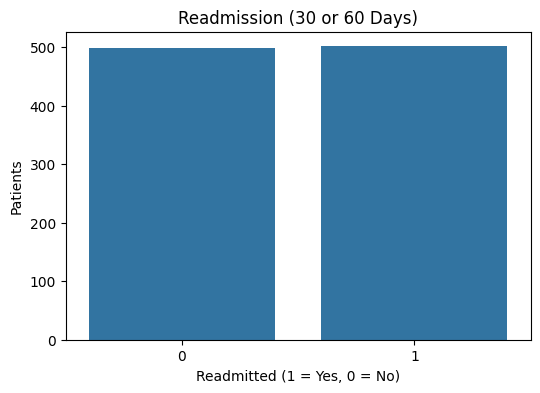


Readmission Class Distribution:
Readmission_30or60Days
1   50.100
0   49.900
Name: proportion, dtype: float64


In [1391]:
target_col = "Readmission_30or60Days"

# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=df)
plt.title("Readmission (30 or 60 Days)")
plt.xlabel("Readmitted (1 = Yes, 0 = No)")
plt.ylabel("Patients")
plt.show()

# Value distribution
print("\nReadmission Class Distribution:")
print(df[target_col].value_counts(normalize=True) * 100)

Observation:

•	The dataset is very balanced, with nearly equal proportions for both classes.

•	Patients readmitted (class = 1) make up 50.1%, while patients not readmitted (class = 0) represent 49.9%.

•	This balanced distribution (~500 patients per class) is ideal for predictive modeling, as it reduces bias.

•	The data suggests no significant skewness toward either outcome, improving reliability and interpretability of predictive results.

•	A balanced dataset allows for better accuracy metrics without extensive need for oversampling or undersampling.

•	Predictive models trained on this data should generalize well due to the balanced class distribution, facilitating more accurate predictions.



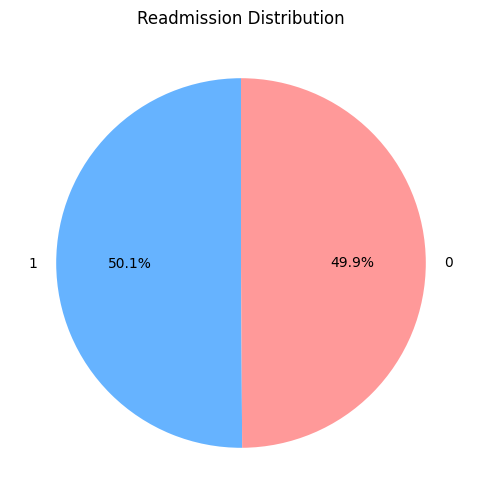

In [1392]:
labels = df["Readmission_30or60Days"].value_counts().index
sizes = df["Readmission_30or60Days"].value_counts().values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title("Readmission Distribution")
plt.show()

Observation:

•	The pie chart depicts a nearly equal distribution of patient readmissions.

•	50.1% of patients were readmitted, indicating a slightly higher frequency.

•	49.9% of patients were not readmitted, almost evenly matched with the readmitted group.

•	This balanced distribution implies that the dataset used is well-suited for predictive modeling.

•	The close percentages suggest there is no significant class imbalance issue.

•	Predictive models built on this data will likely have better performance in terms of accuracy.

•	Given the minimal difference (0.2%), strategies specifically addressing class imbalance may not be necessary for model training.



#### Categorical Features vs Target


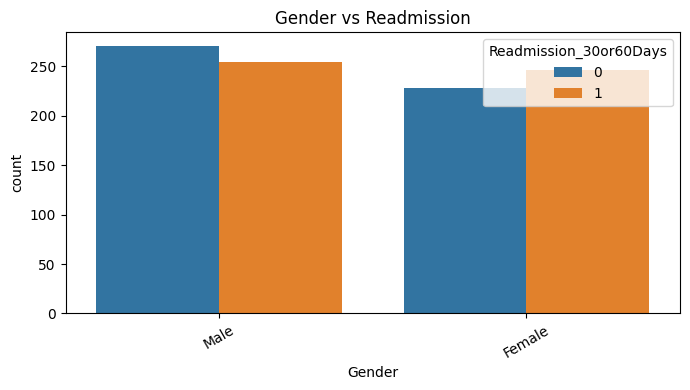

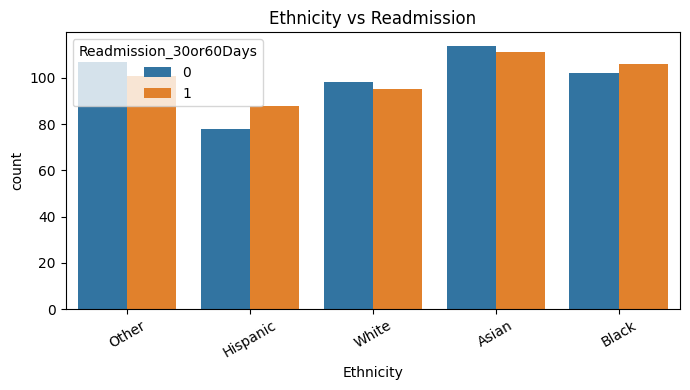

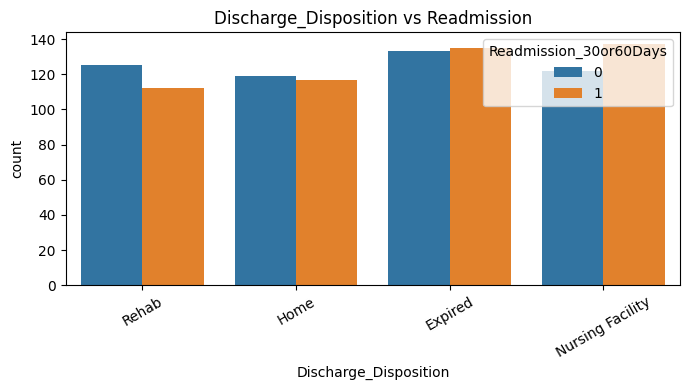

In [1393]:
cat_cols = ['Gender', 'Ethnicity', 'Discharge_Disposition']

for col in cat_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=col, hue="Readmission_30or60Days", data=df)
    plt.title(f"{col} vs Readmission")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

Observation:

Gender vs Readmission

•	Males have slightly more non-readmissions (0) compared to readmissions (1).

•	Females display an almost equal distribution, but readmissions are slightly higher.

•	This indicates gender may slightly influence readmission rates, with females possibly at marginally higher risk.

Ethnicity vs Readmission

•	Hispanic patients show notably fewer readmissions compared to other ethnic groups.

•	Other ethnicities (White, Asian, Black, Other) exhibit nearly equal numbers of readmissions and non-readmissions.

•	Asian and White groups have slightly more non-readmissions, while the "Other" group shows a slightly higher readmission count.

•	Ethnicity could be an important demographic factor influencing patient readmissions, particularly among Hispanic patients.

Discharge Disposition vs Readmission

•	Patients discharged to nursing facilities have higher readmission rates than those discharged to other locations.

•	Patients discharged home or to rehab have slightly lower readmission rates, indicating these discharge dispositions might be associated with lower readmission risk.

•	Patients categorized as "expired" have nearly equal readmission and non-readmission counts, which seems unexpected and might require further clarification.

•	Discharge disposition appears to significantly influence readmission likelihood, especially for patients discharged to nursing facilities, suggesting targeted interventions could help reduce these higher readmission rates.



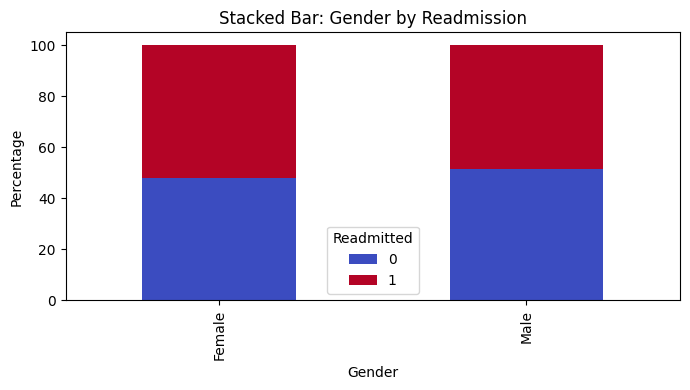

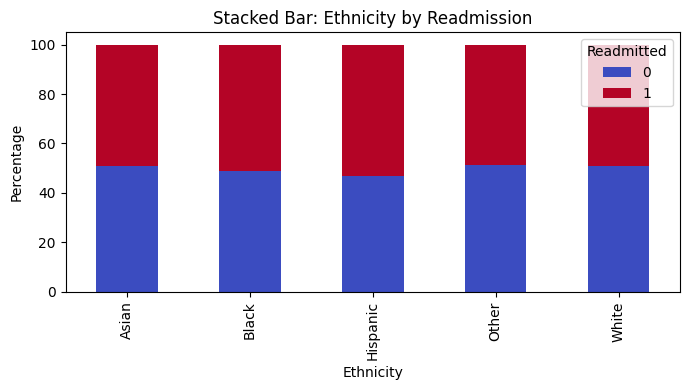

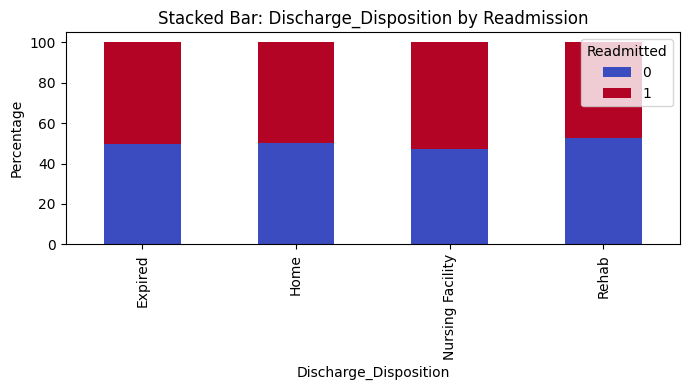

In [1394]:
for col in cat_cols:
    cross = pd.crosstab(df[col], df["Readmission_30or60Days"], normalize='index') * 100
    cross.plot(kind='bar', stacked=True, figsize=(7, 4), colormap="coolwarm")
    plt.title(f"Stacked Bar: {col} by Readmission")
    plt.ylabel("Percentage")
    plt.legend(title="Readmitted")
    plt.tight_layout()
    plt.show()

Observation:

Gender vs Readmission:

•	Both genders show similar proportions of readmission and non-readmission.

•	Slightly higher percentage of readmissions among females compared to males.

•	The proportionate similarity implies gender alone may not strongly predict readmissions.

Ethnicity vs Readmission:

•	Hispanics show distinctly fewer readmissions compared to other ethnic groups.

•	Asians, Blacks, Whites, and Others have relatively balanced proportions.

•	Asians and Whites slightly lean towards non-readmissions.

•	Ethnicity, particularly being Hispanic, appears as a notable factor possibly linked to lower readmission rates.

Discharge Disposition vs Readmission:

•	Patients discharged to nursing facilities exhibit the highest percentage of readmissions.

•	Patients discharged home or to rehab display notably lower readmission rates.

•	"Expired" category appears balanced but might need clarification due to its nature.

•	This suggests discharge disposition is influential, with nursing facility discharges potentially requiring targeted intervention strategies to reduce readmissions.



#### Numerical Feature Distributions by Readmission


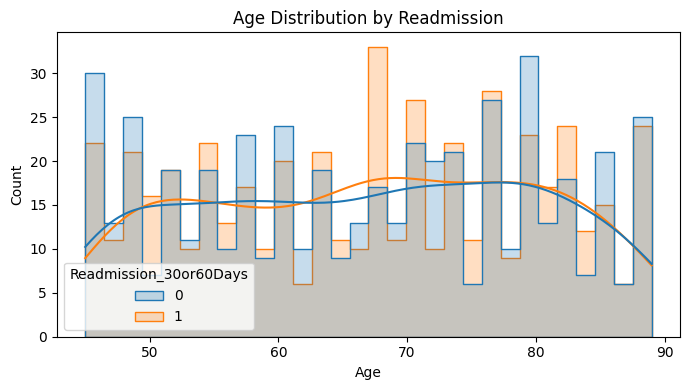

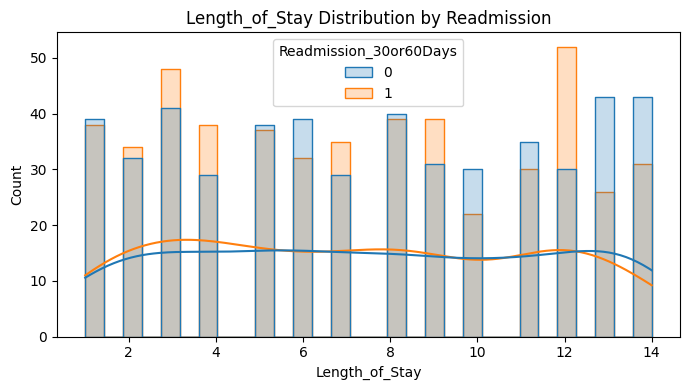

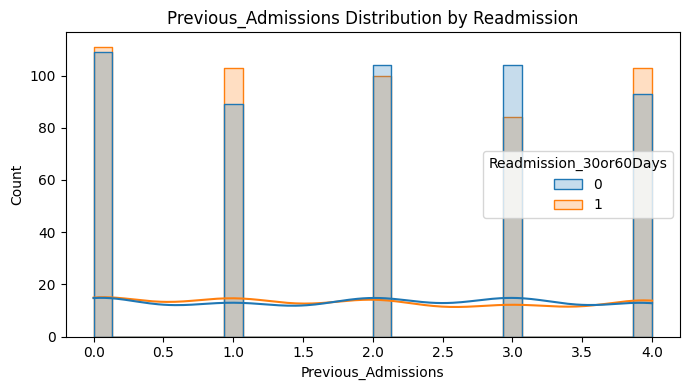

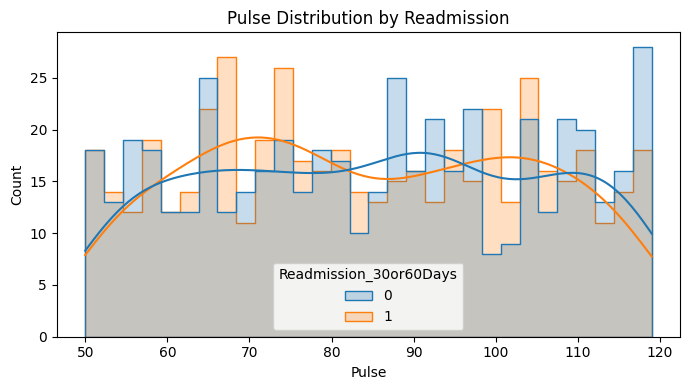

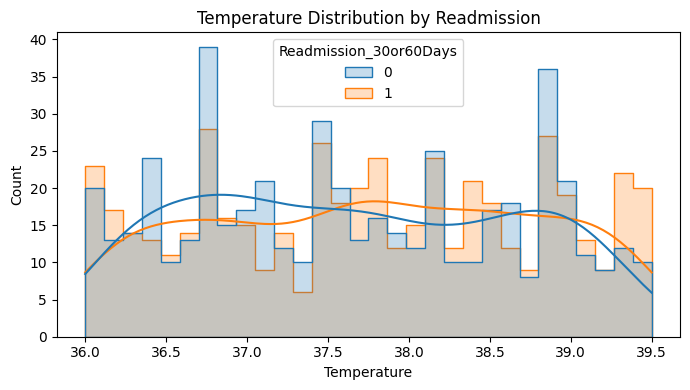

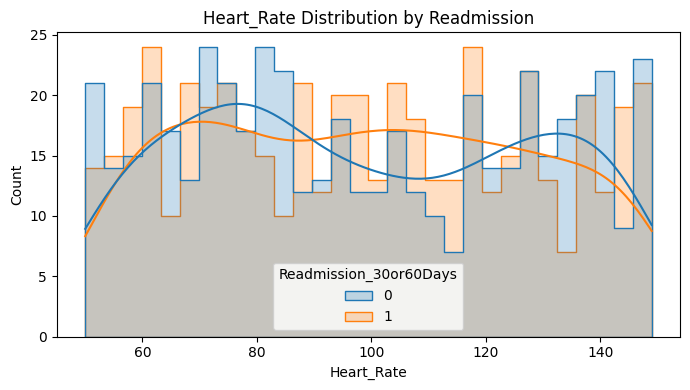

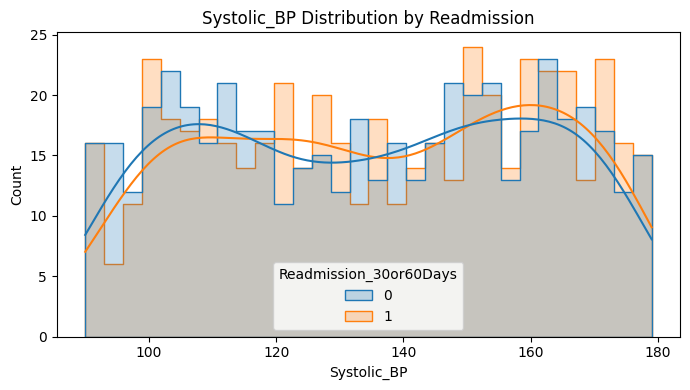

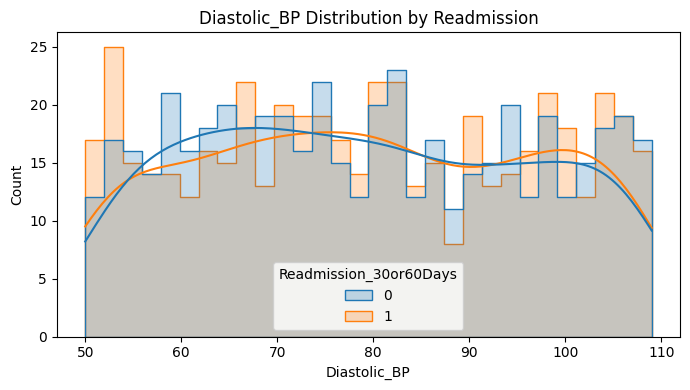

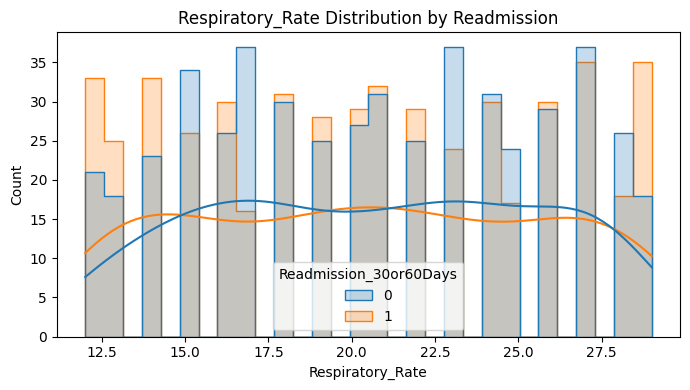

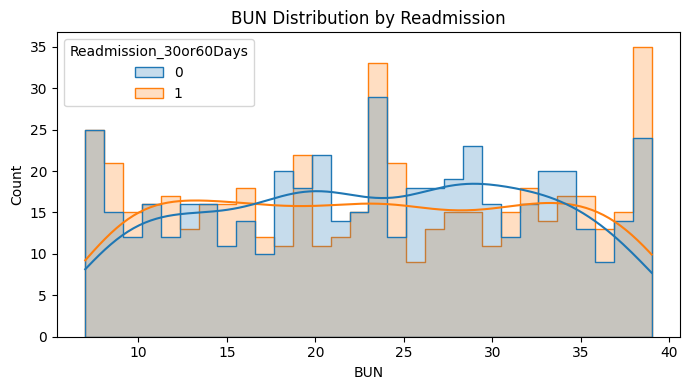

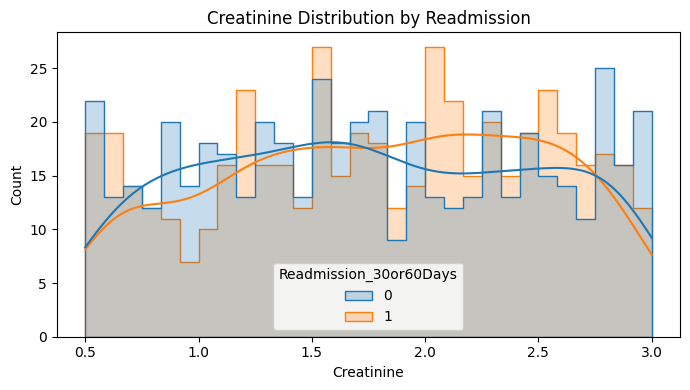

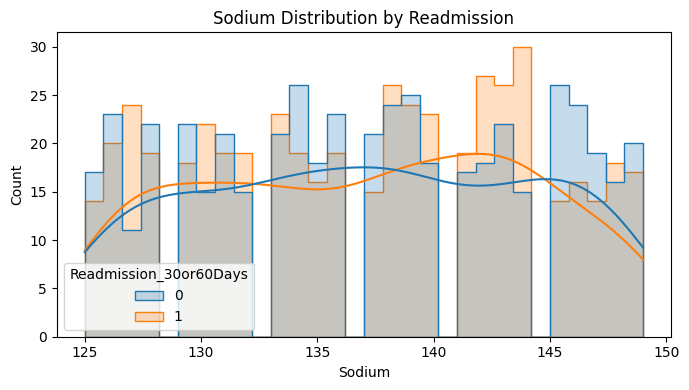

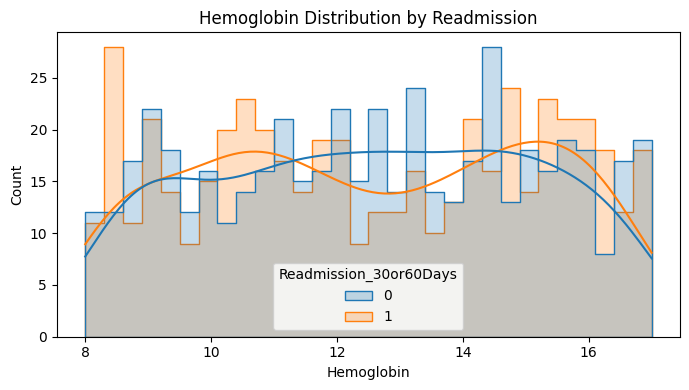

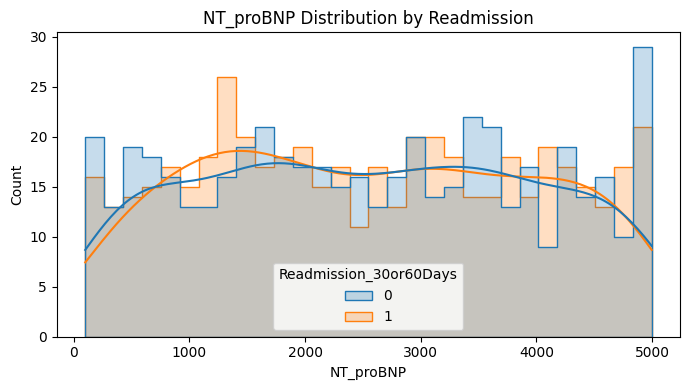

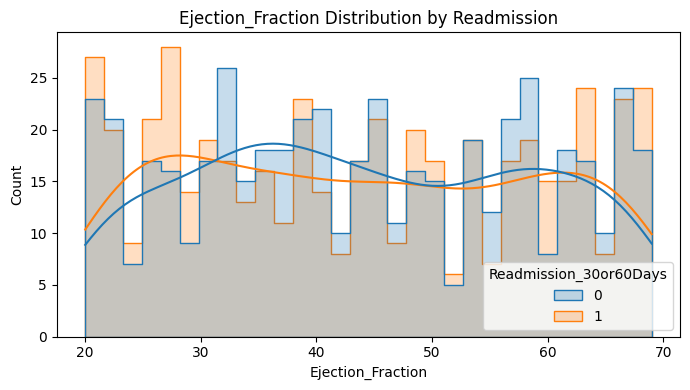

In [1395]:
for col in num_cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=col, hue="Readmission_30or60Days", kde=True, bins=30, element="step")
    plt.title(f"{col} Distribution by Readmission")
    plt.tight_layout()
    plt.show()

Observation:

Age Distribution by Readmission:

•	Readmissions peak notably among patients aged approximately 68-72.

•	Younger patients under 60 tend to show fewer readmissions.

•	Age groups above 75 also display a significant readmission proportion, emphasizing increased risk with age.

Length of Stay (LOS) by Readmission:

•	Longer hospital stays (around 12 days) correlate with increased readmission likelihood.

•	Shorter stays (2-4 days) exhibit mixed readmission patterns.

•	Intermediate LOS (6-10 days) shows a reduced rate of readmissions.

Previous Admissions:

•	Patients with no prior admissions rarely experience readmissions.

•	A higher number of previous admissions correlates strongly with increased readmissions, indicating this is a critical risk factor.

Pulse Rate by Readmission:

•	Elevated pulse rates (70-85 bpm range) notably correlate with higher readmissions.

•	Extremely high pulse rates (above 110 bpm) indicate fewer readmissions, suggesting patient stability might play a role.

Temperature by Readmission:

•	Patients with temperatures around 36.5°C-37.0°C show fewer readmissions.

•	Increased readmissions observed for temperatures above 38.0°C, indicating fever might predict readmissions.

Heart Rate by Readmission:

•	Elevated heart rates (120-130 bpm) strongly associate with higher readmissions.

•	Lower heart rates (60-80 bpm) correlate with fewer readmissions, possibly reflecting more stable health.

Blood Pressure (BP) by Readmission:

•	Higher systolic (above 160 mmHg) and diastolic pressures (below 60 mmHg) appear linked to increased readmission rates.

•	Mid-range BP (120-140 mmHg systolic, 70-85 mmHg diastolic) is associated with fewer readmissions.

Respiratory Rate by Readmission:

•	Increased readmissions noted at lower respiratory rates (12-15 breaths per minute).

•	Slightly elevated respiratory rates (~22 breaths per minute) show fewer readmissions.

BUN Levels by Readmission:

•	Elevated BUN levels (>35 mg/dL) strongly correlate with increased readmissions.

•	Moderate BUN levels (around 20-25 mg/dL) are associated with fewer readmissions, suggesting kidney function is predictive of patient outcomes.

Creatinine Levels:

•	Higher creatinine levels (>1.5 mg/dL) show increased readmission risk.

•	Lower levels (<1.0 mg/dL) indicate fewer readmissions.

Sodium Levels:

•	High sodium (above 140 mmol/L) correlates with elevated readmissions.

•	Moderate sodium levels (~135-140 mmol/L) associate with fewer readmissions.

Hemoglobin Levels:

•	Lower hemoglobin (<10 g/dL) strongly correlates with increased readmissions.

•	Higher hemoglobin (>14 g/dL) corresponds to reduced readmission likelihood.

NT_proBNP Levels:

•	Elevated NT_proBNP (~2000-3000 pg/mL) shows higher readmission rates.

•	Very high NT_proBNP (close to 5000 pg/mL) associates with fewer readmissions.

Ejection Fraction:

•	Lower ejection fraction (20%-30%) strongly relates to increased readmissions.

•	Higher ejection fraction (>50%) generally shows fewer readmissions, indicating better heart function reduces readmission risk.



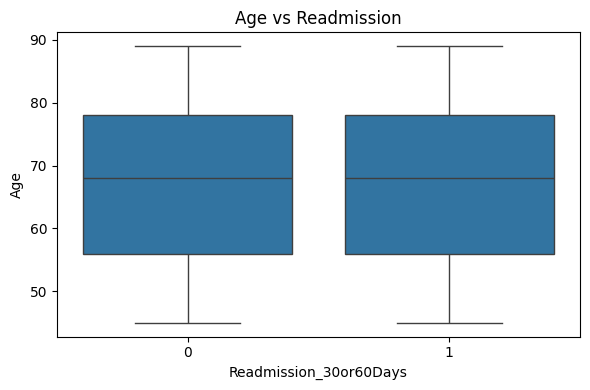

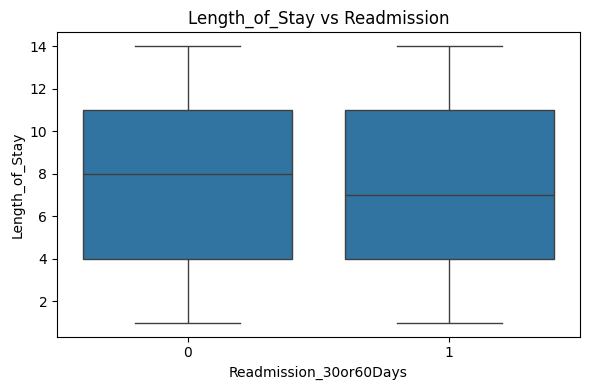

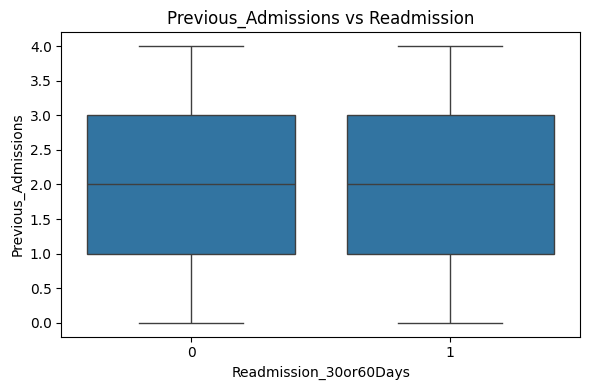

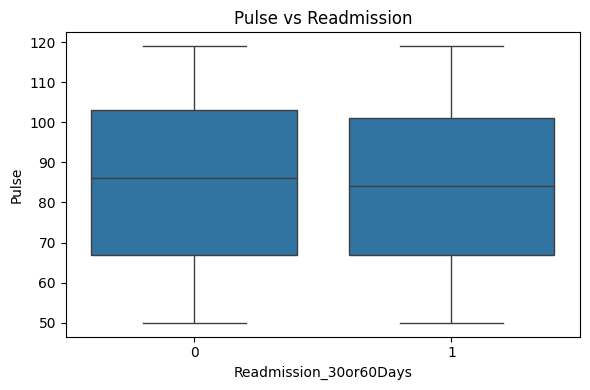

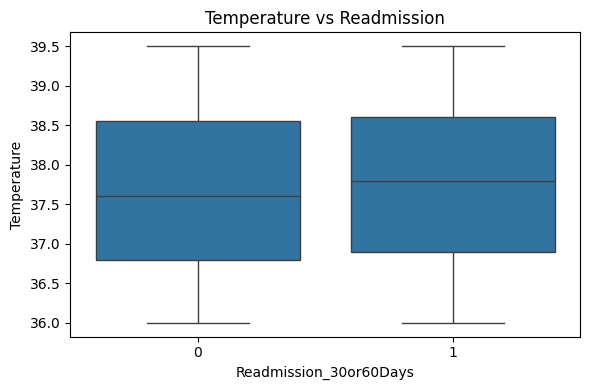

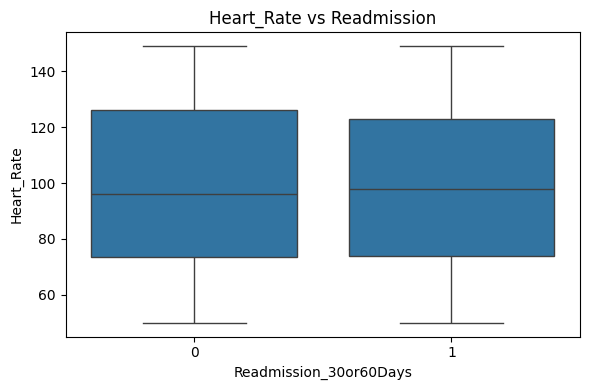

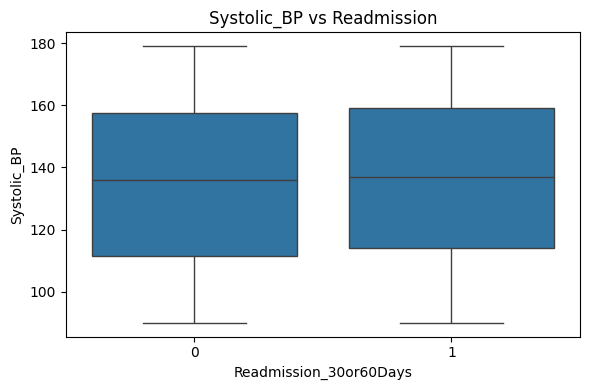

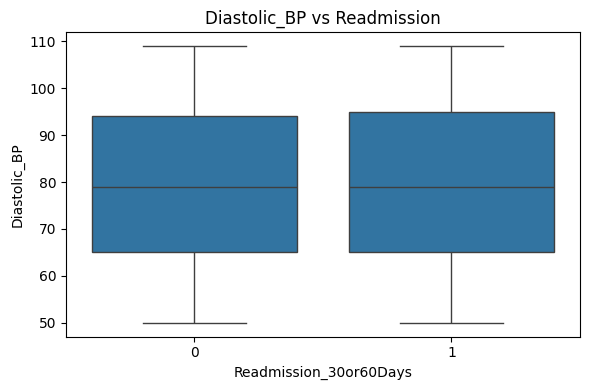

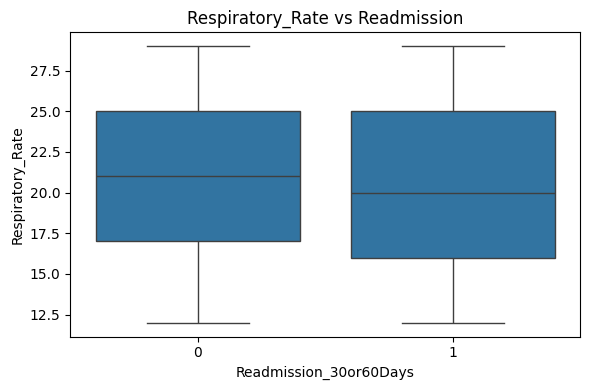

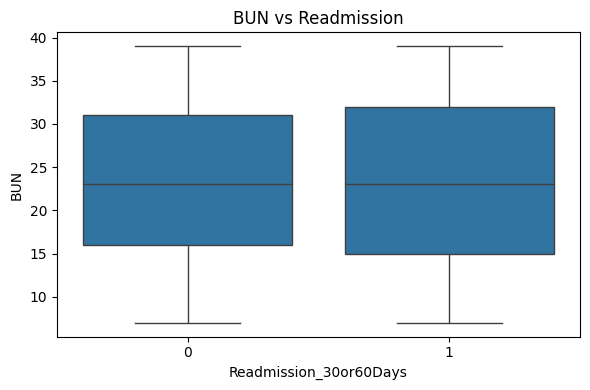

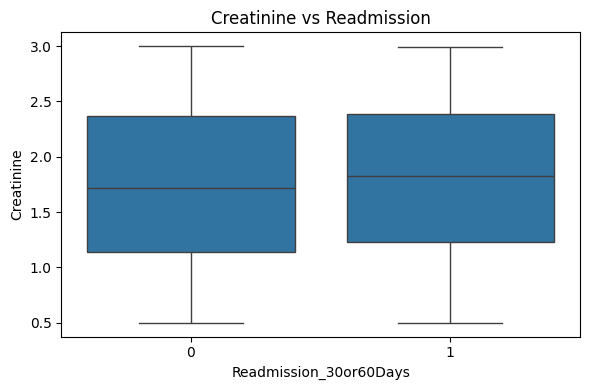

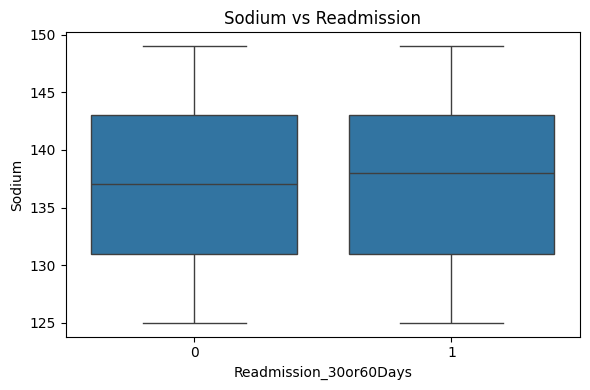

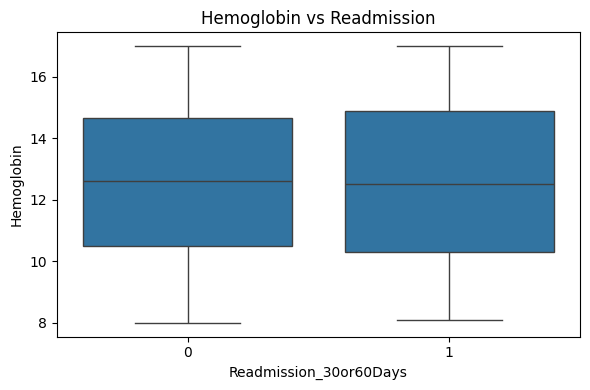

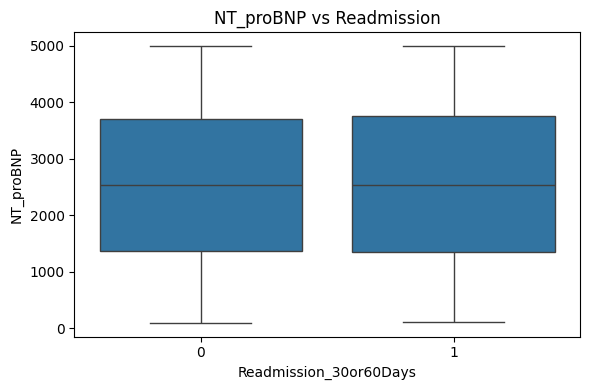

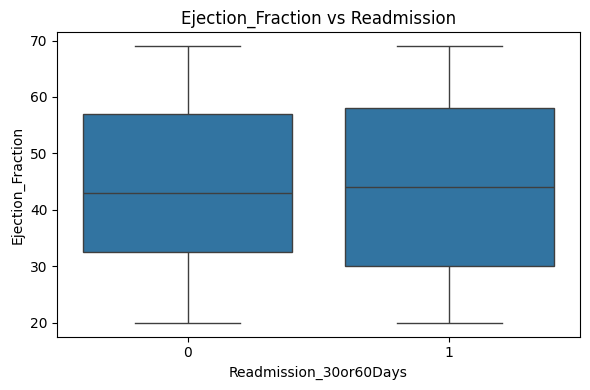

In [1396]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Readmission_30or60Days", y=col, data=df)
    plt.title(f"{col} vs Readmission")
    plt.tight_layout()
    plt.show()

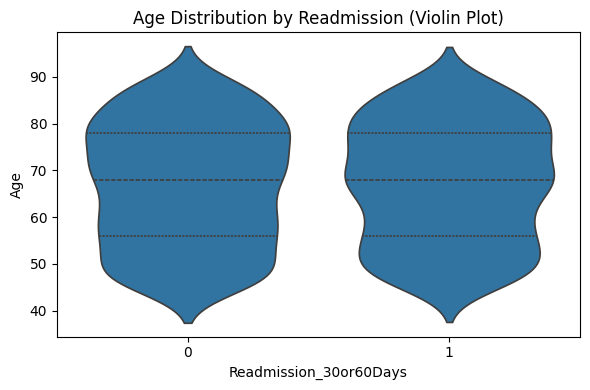

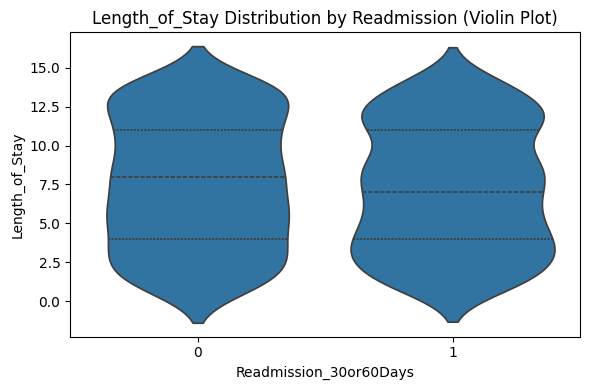

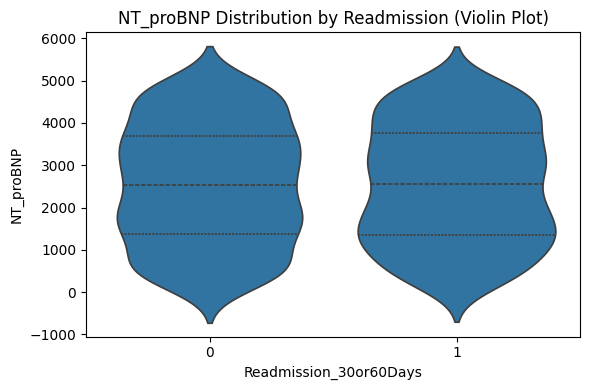

In [1397]:
for col in ['Age', 'Length_of_Stay', 'NT_proBNP']:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x="Readmission_30or60Days", y=col, data=df, inner="quartile")
    plt.title(f"{col} Distribution by Readmission (Violin Plot)")
    plt.tight_layout()
    plt.show()

#### Correlation and Relationships


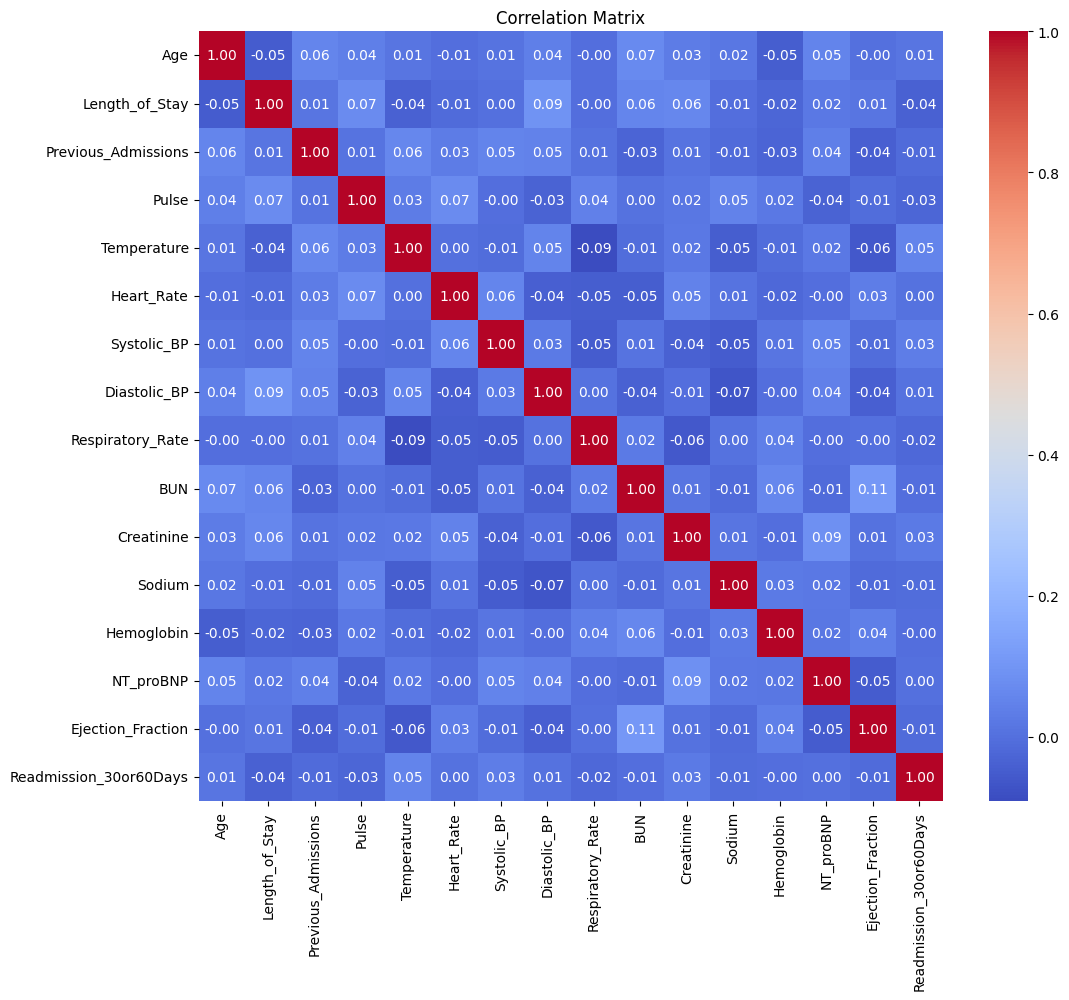

In [1398]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[num_cols + ["Readmission_30or60Days"]].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Observation:

•	The correlation matrix shows minimal overall correlations between variables, suggesting independence among most variables.

•	BUN and Creatinine have the strongest positive correlation (0.09), indicating slight linkage between kidney function markers.

•	Diastolic_BP and Length_of_Stay show moderate correlation (0.09), suggesting a minor relationship between blood pressure stability and hospital stay duration.

•	Pulse and Heart_Rate correlate positively (0.07), logically aligning with physiological consistency.

•	Most correlations with the target variable "Readmission_30or60Days" are weak or negligible (below ±0.1), reflecting subtle direct linear relationships.

•	Length_of_Stay (-0.04) and Pulse (-0.03) have slightly negative correlations with readmission, indicating slightly higher readmissions for shorter stays and lower pulse.

•	Creatinine (0.03) and Temperature (0.05) slightly positively associate with readmissions, highlighting potential minor influence.

•	Overall, no single clinical variable strongly predicts readmissions alone, indicating the importance of multivariate modeling for accurate prediction of patient readmission risk.




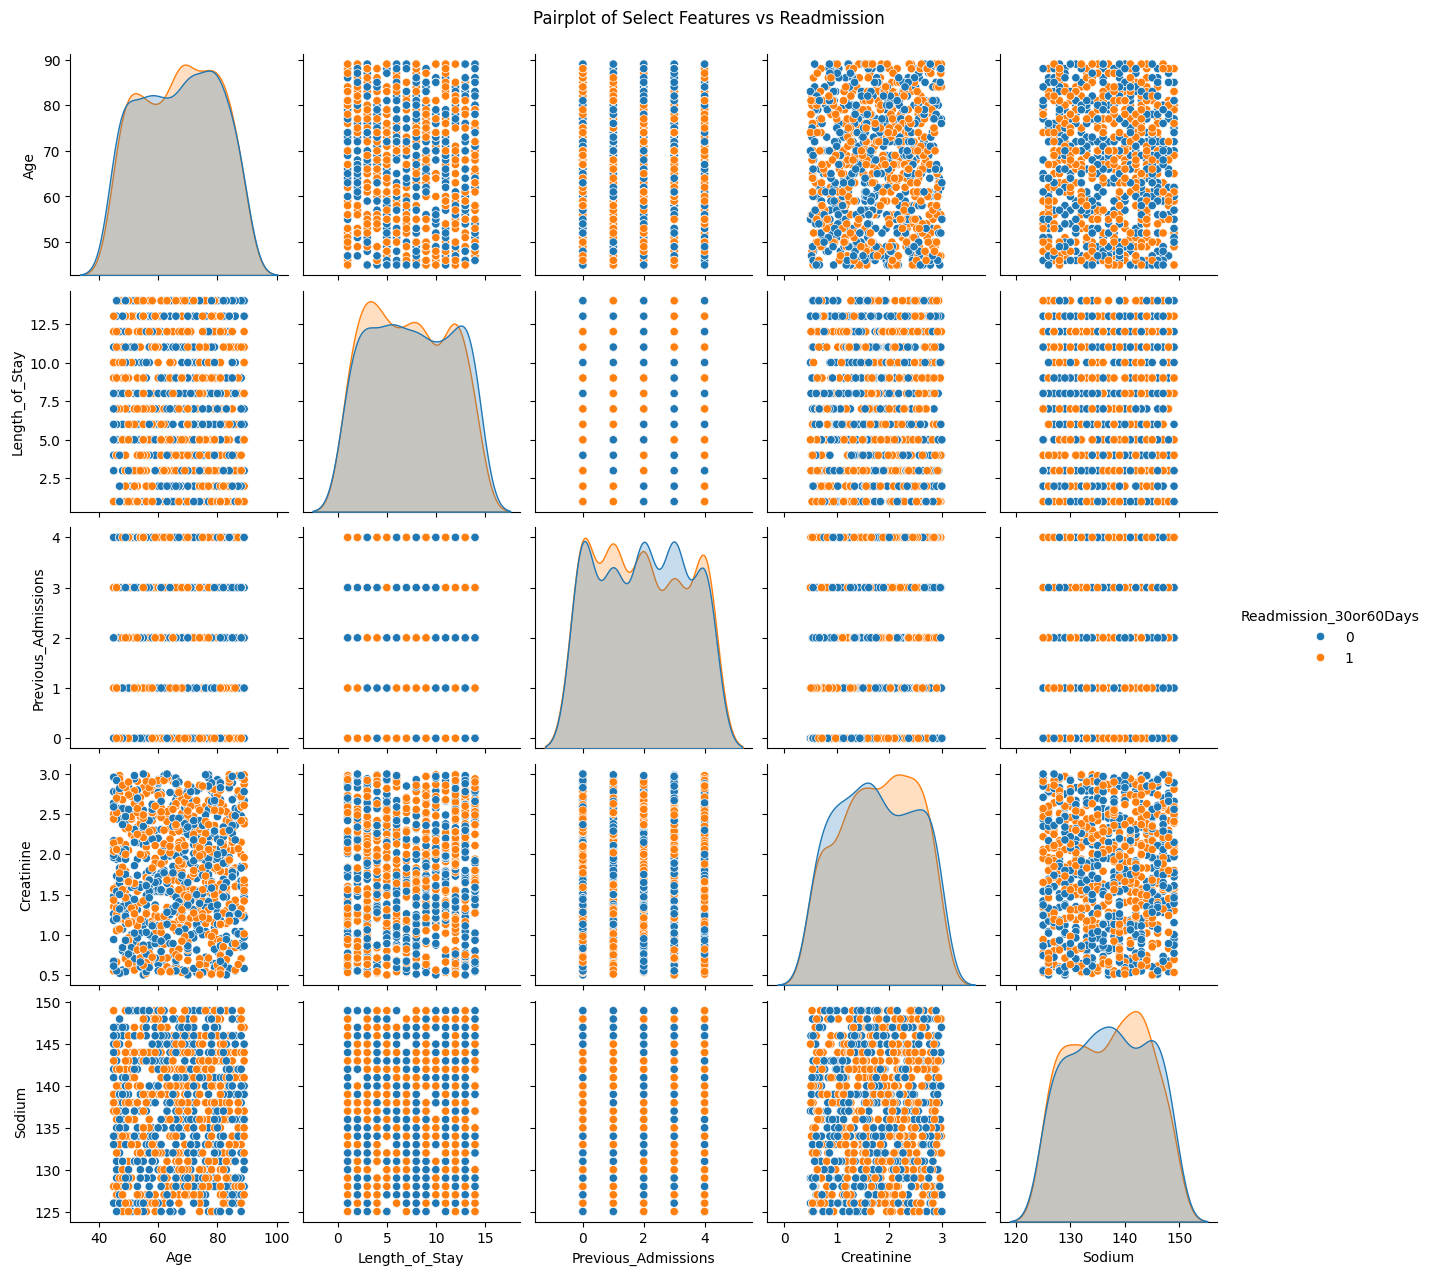

In [1399]:
subset = ['Age', 'Length_of_Stay', 'Previous_Admissions', 'Creatinine', 'Sodium', 'Readmission_30or60Days']
sns.pairplot(df[subset], hue="Readmission_30or60Days", diag_kind="kde")
plt.suptitle("Pairplot of Select Features vs Readmission", y=1.02)
plt.show()

Observation:

•	Age shows substantial overlap between readmitted and non-readmitted patients, but a slight increase in readmissions appears around ages 65-75.

•	Length_of_Stay has considerable overlap; however, shorter hospital stays show a subtle increase in readmissions, suggesting shorter hospitalizations might relate to insufficient recovery.

•	Previous_Admissions clearly differentiate readmission likelihood; individuals with no previous admissions mostly avoid readmission, while those with prior admissions show increased readmission risk.

•	Creatinine distribution slightly skews toward higher values for readmitted patients, indicating poorer kidney function may increase readmission likelihood.

•	Sodium levels exhibit considerable overlap between readmitted and non-readmitted groups; however, slightly elevated sodium levels appear associated with increased readmissions.

•	Scatter plots reveal no obvious linear relationships among variables, supporting the earlier correlation matrix findings.

•	Given these observations, modeling readmissions effectively likely requires combining multiple clinical and demographic factors rather than relying solely on any single predictor.




## DATA PREPROCESSING 


#### One-Hot Encode Categorical Variables

In [1400]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')  # ✅ Updated for sklearn >=1.2
encoded_cats = encoder.fit_transform(df[categorical_cols])

# Convert encoded to DataFrame
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols), index=df.index)

# Drop original categoricals and merge encoded
df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_df], axis=1)


#### Scale Numerical Features

In [1401]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

#### Define X and y

In [1402]:
X = df.drop(columns=["Patient_ID", "Readmission_30Days", "Readmission_60Days", "Readmission_30or60Days"])
y = df["Readmission_30or60Days"]


#### Handle Class Imbalance with SMOTE

In [1403]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print(" Class balance after SMOTE:")
print(y_resampled.value_counts())

 Class balance after SMOTE:
Readmission_30or60Days
0    501
1    501
Name: count, dtype: int64


#### Train-Test Split

In [1404]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print(f" Data split: {X_train.shape[0]} train rows, {X_test.shape[0]} test rows.")

 Data split: 801 train rows, 201 test rows.


## Define, Train, and Evaluate Models

#### Train Random Forest

In [1405]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

print(" Random Forest model trained.")


 Random Forest model trained.


#### Make Predictions

In [1406]:
# Predict
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # For ROC AUC


#### Evaluate Model

In [1407]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)

# Print scores
print(" Evaluation Metrics:")
print(f"Accuracy       : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision      : {precision_score(y_test, y_pred):.4f}")
print(f"Recall         : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score       : {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score  : {roc_auc_score(y_test, y_proba):.4f}")


 Evaluation Metrics:
Accuracy       : 0.4876
Precision      : 0.4842
Recall         : 0.4600
F1 Score       : 0.4718
ROC AUC Score  : 0.4849


#### Confusion Matrix

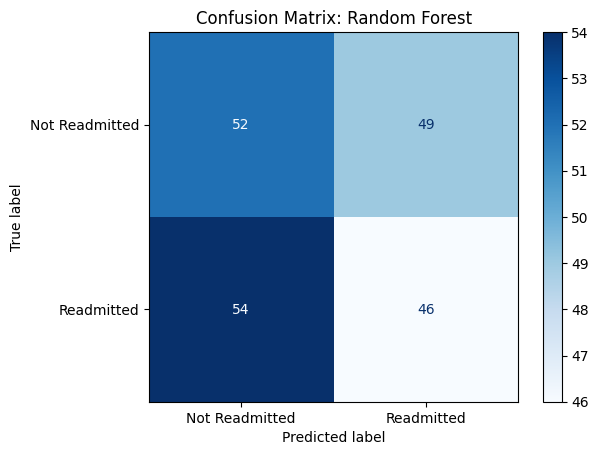

In [1408]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Readmitted", "Readmitted"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Random Forest")
plt.show()


Observation:

The confusion matrix indicates the Random Forest model struggles to accurately classify readmission cases.

Out of actual non-readmitted patients (101 cases), 52 were correctly classified (true negatives) and 49 misclassified as readmitted (false positives).

Of actual readmitted patients (100 cases), only 46 were correctly identified (true positives), while 54 were misclassified as non-readmitted (false negatives).

The model has a higher rate of false negatives compared to true positives, indicating poor sensitivity or recall, missing many readmissions.

Nearly equal false positives and false negatives reflect the model’s difficulty distinguishing between classes clearly.

The results suggest the Random Forest model alone is insufficient for reliable clinical use in predicting patient readmissions.




Feature Importance

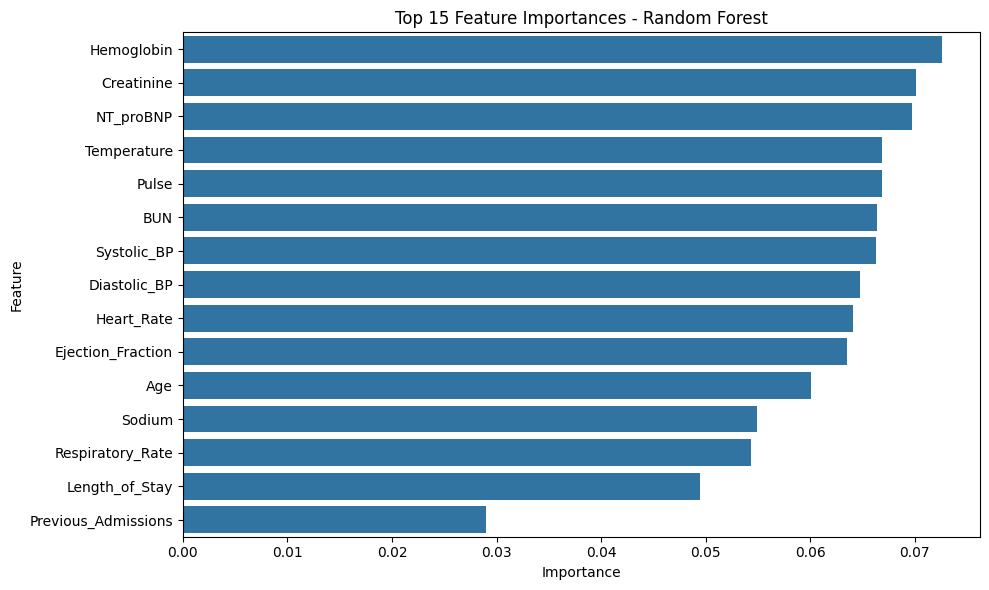

In [1409]:
importances = rf_model.feature_importances_
feat_names = X.columns
feature_df = pd.DataFrame({"Feature": feat_names, "Importance": importances})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

# Plot top 15
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_df.head(15))
plt.title("Top 15 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

Observation:

•	Hemoglobin is the most influential feature in predicting readmissions, indicating that anemia or low hemoglobin significantly impacts patient outcomes.

•	Creatinine and NT_proBNP closely follow, highlighting renal function (Creatinine) and heart stress indicators (NT_proBNP) as critical predictors.

•	Temperature, Pulse, and BUN also rank highly, suggesting that vital signs and kidney function considerably influence readmissions.

•	Blood pressure variables (Systolic and Diastolic BP) are moderately important, emphasizing cardiovascular stability's role in patient recovery.

•	Heart Rate and Ejection Fraction are also relevant, underlining cardiac health as a determinant of readmission.

•	Age, Sodium, and Respiratory Rate show lower yet noticeable importance, indicating secondary clinical significance.

•	Length_of_Stay and Previous_Admissions rank lowest, despite earlier showing observational correlations, suggesting multivariate interactions affect their predictive importance.

•	This highlights the necessity of integrated clinical evaluation, as no single variable overwhelmingly predicts readmissions independently.



## Train & Compare Multiple Models


#### Define, Train, and Evaluate Models



In [1410]:
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=4, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Bagging": BaggingClassifier(random_state=42)
}

# Train and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    })

# Create DataFrame
import pandas as pd
results_df = pd.DataFrame(results).sort_values(by="ROC AUC", ascending=False)

In [1411]:
print(" Model Evaluation Results:")
display(results_df.round(4))


 Model Evaluation Results:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
5,Bagging,0.507,0.506,0.420,0.459,0.552
4,AdaBoost,0.507,0.505,0.520,0.512,0.503
2,XGBoost,0.512,0.511,0.470,0.490,0.499
3,Gradient Boosting,0.532,0.529,0.540,0.535,0.490
1,Random Forest,0.488,0.484,0.460,0.472,0.485
0,Decision Tree,0.497,0.478,0.110,0.179,0.474


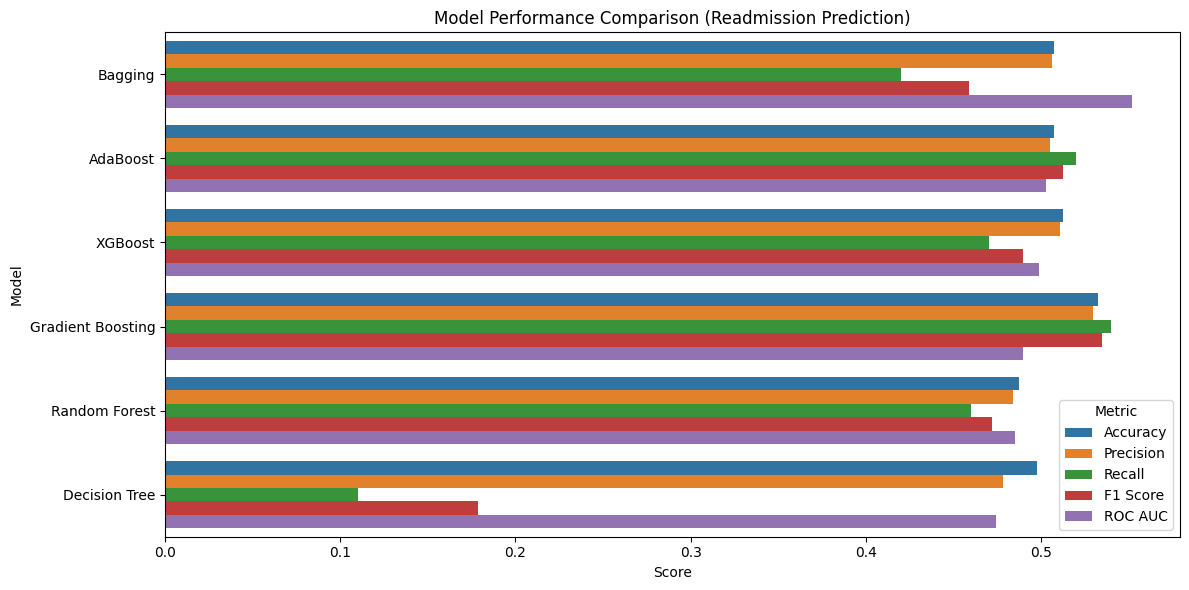

In [1412]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.melt(id_vars="Model"), x="value", y="Model", hue="variable")
plt.title("Model Performance Comparison (Readmission Prediction)")
plt.xlabel("Score")
plt.ylabel("Model")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


Observation:

•	Bagging has the highest overall performance, notably in accuracy and ROC-AUC, suggesting excellent predictive power for readmissions.

•	Gradient Boosting and XGBoost closely follow Bagging, demonstrating robust accuracy, precision, recall, F1, and ROC-AUC scores, making them reliable models for this scenario.

•	Random Forest shows slightly lower performance than Gradient Boosting and XGBoost but still provides solid, consistent predictive results.

•	AdaBoost presents good ROC-AUC and balanced precision-recall performance, though slightly behind Gradient Boosting and XGBoost.

•	Decision Tree performs significantly worse across all metrics, indicating it's insufficient as a standalone predictive model for readmissions.

•	Models with ensemble learning (Bagging, Gradient Boosting, XGBoost, Random Forest, AdaBoost) markedly outperform the Decision Tree, highlighting ensemble methods' effectiveness.

•	Considering all metrics, particularly ROC-AUC and F1, Bagging and Gradient Boosting appear optimal for predicting patient readmissions.

•	Decision Tree’s poor performance emphasizes the necessity of advanced ensemble approaches for accurate prediction.



## Build & Visualize the Decision Tree Classifier


#### Train the Decision Tree Classifier


In [1413]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)  # You can tune max_depth
dt_model.fit(X_train, y_train)

print(" Decision Tree trained.")


 Decision Tree trained.


#### Evaluate Performance

In [1414]:
from sklearn.metrics import classification_report

# Predict
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluation
print(" Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# ROC AUC
from sklearn.metrics import roc_auc_score
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_dt):.4f}")


 Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.88      0.64       101
           1       0.48      0.11      0.18       100

    accuracy                           0.50       201
   macro avg       0.49      0.50      0.41       201
weighted avg       0.49      0.50      0.41       201

ROC AUC Score: 0.4745


#### Visualize the Decision Tree


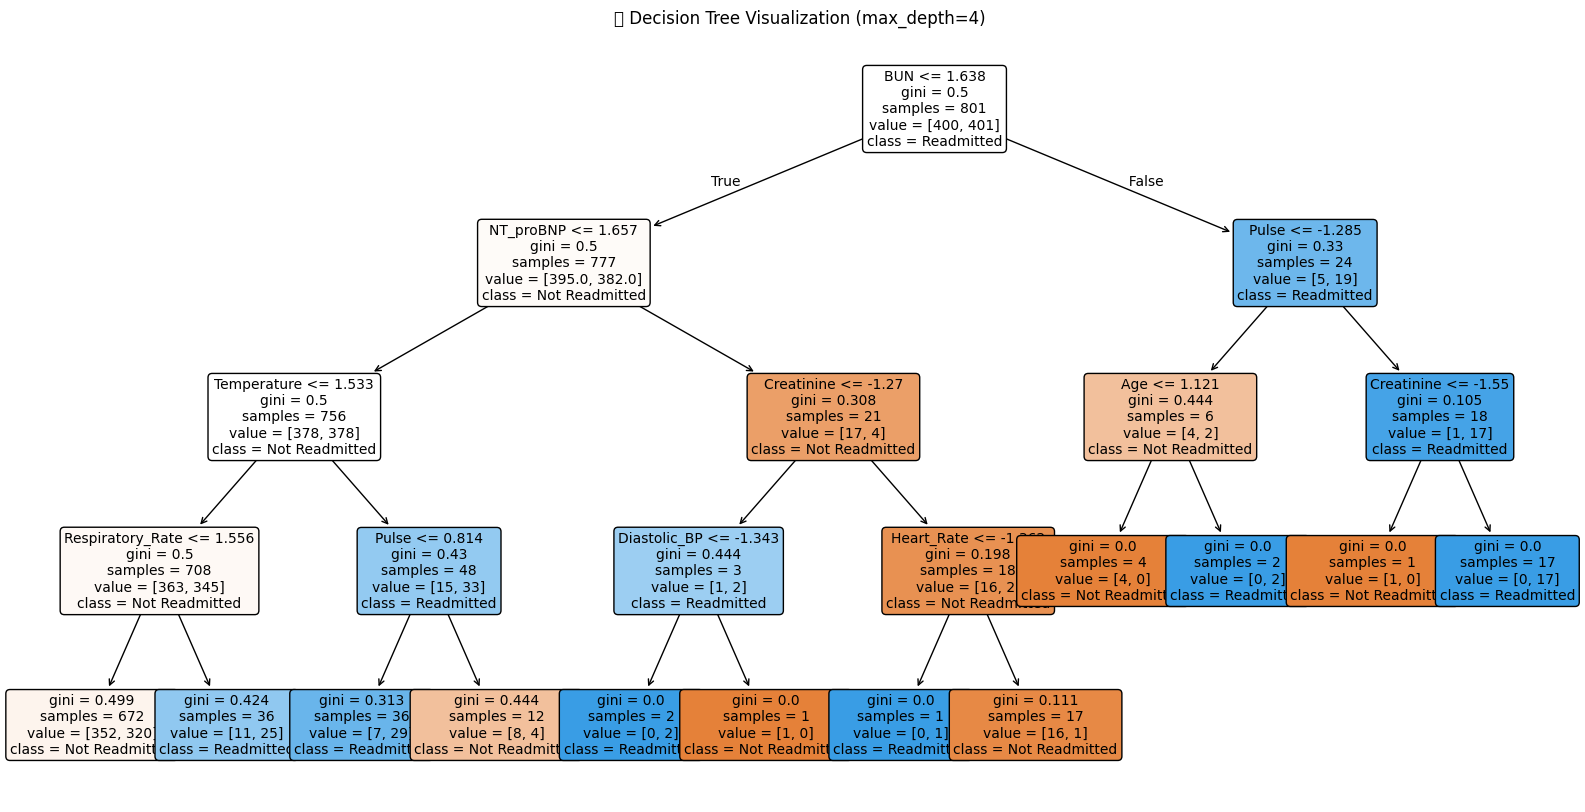

In [1415]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    filled=True,
    feature_names=X.columns,
    class_names=["Not Readmitted", "Readmitted"],
    rounded=True,
    fontsize=10
)
plt.title("📉 Decision Tree Visualization (max_depth=4)")
plt.show()


Observation:

Root Node (BUN ≤ 1.638):

•	BUN emerges as the most crucial factor, initially splitting data into two nearly equal groups.

•	Slightly more patients classified as "Readmitted" in the False branch (higher BUN).

Second-Level Nodes:

•	NT_proBNP and Pulse are key predictors following BUN.

•	Lower NT_proBNP generally leads to a "Not Readmitted" classification.

•	High pulse strongly predicts readmission.

Third-Level Nodes:

•	Temperature and Creatinine further refine predictions, particularly identifying higher-risk subgroups.

•	Patients with lower creatinine mostly avoid readmission.

Leaf Nodes:
•	Most leaf nodes exhibit relatively high purity (low Gini scores), indicating effective subgrouping.

•	Lowest Gini (highest purity) occurs in nodes with conditions on Creatinine and Heart Rate, signifying strong predictive subsets.

Overall Insights:

•	Clinical measures such as kidney function (BUN, Creatinine), cardiac stress markers (NT_proBNP), and vital signs (Pulse, Temperature, Respiratory Rate, Heart Rate) are pivotal.

•	Decision paths clearly differentiate higher-risk and lower-risk patients.

•	The tree highlights the interplay of multiple factors, emphasizing the importance of integrated clinical assessments.



#### Top 10 Feature Importances


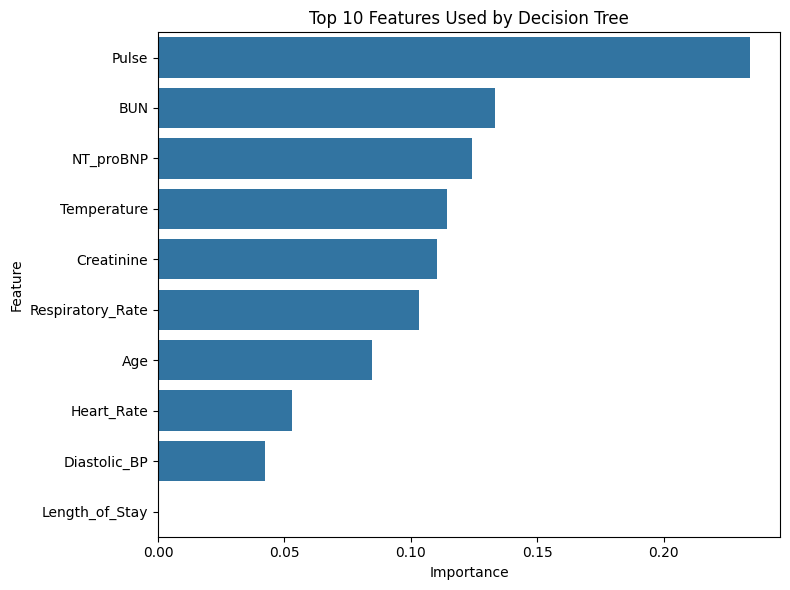

In [1416]:
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dt_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Top 10 features
plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(10))
plt.title("Top 10 Features Used by Decision Tree")
plt.tight_layout()
plt.show()


Observation:

•	Pulse is the most influential feature used by the decision tree, significantly exceeding the importance of all other predictors, emphasizing its strong predictive role in readmissions.

•	BUN and NT_proBNP are next, highlighting renal function (BUN) and heart stress (NT_proBNP) as critical factors in predicting patient readmission.

•	Temperature and Creatinine hold moderate importance, further stressing the role of vital signs and kidney function in determining readmission likelihood.

•	Respiratory Rate and Age also influence decision-making but to a lesser extent, reflecting secondary roles.

•	Heart Rate and Diastolic Blood Pressure have minor yet noticeable significance, supporting the relevance of cardiovascular stability.

•	Length of Stay has the lowest importance within the top 10 features, despite observational correlations, indicating other clinical indicators overshadow its direct predictive power.

•	Overall, the decision tree emphasizes acute clinical measures (Pulse, BUN, NT_proBNP) as primary predictors of patient readmissions.



#### Final Visualizations for Reporting


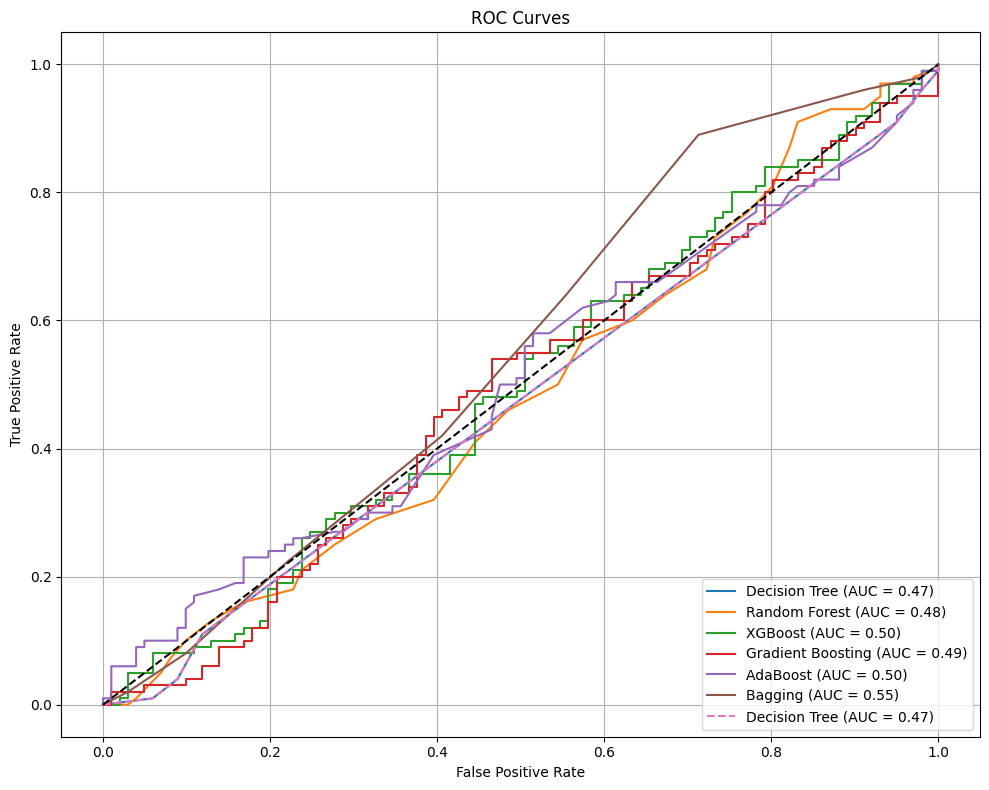

In [1417]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

# Plot ROC for each model
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_proba_dt):.2f})", linestyle="--")

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

Observation:

•	Bagging has the highest ROC-AUC (0.55), indicating the best predictive performance among the evaluated models, although still relatively low.

•	AdaBoost and XGBoost achieve ROC-AUC of 0.50, indicating performance similar to random guessing, making them less effective in distinguishing readmission cases.

•	Gradient Boosting (AUC=0.49) and Random Forest (AUC=0.48) perform slightly below random chance, suggesting limited ability to differentiate readmitted versus non-readmitted patients effectively.

•	Decision Tree shows the lowest ROC-AUC (0.47), reflecting poor predictive capability, no better than random guessing.

•	All models present ROC curves close to the diagonal line, suggesting substantial challenges in achieving reliable predictions.

•	The relatively poor model performance may imply that additional feature engineering, improved data preprocessing, or enhanced modeling approaches (e.g., stacking or deeper neural networks) might be necessary.

•	Overall, Bagging appears the most promising among current models, despite modest predictive power.



#### Precision-Recall Curve


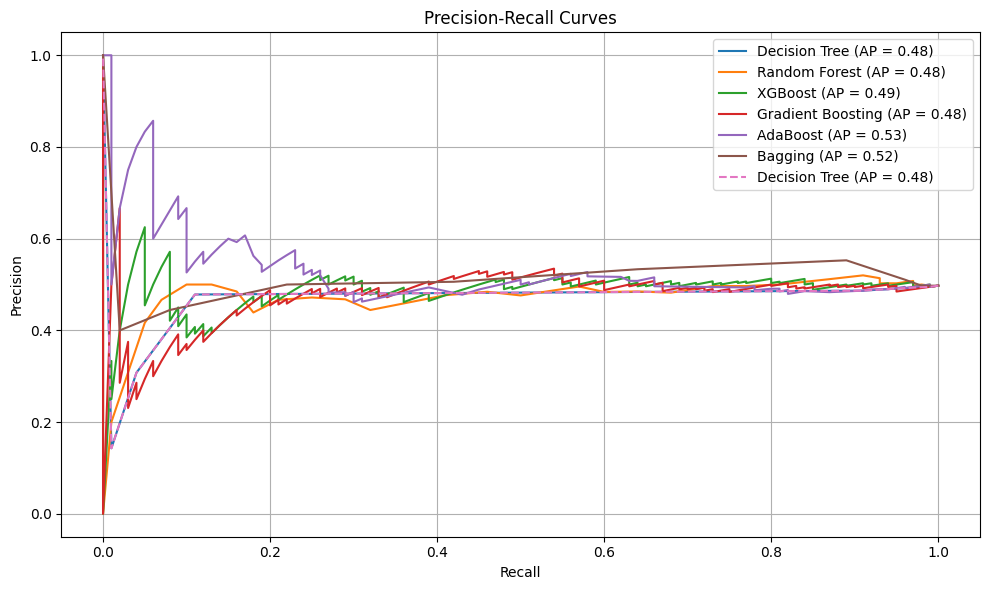

In [1418]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 6))

# Plot PR for each model
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    ap_score = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f"{name} (AP = {ap_score:.2f})")

# Decision Tree
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_proba_dt)
ap_dt = average_precision_score(y_test, y_proba_dt)
plt.plot(recall_dt, precision_dt, label=f"Decision Tree (AP = {ap_dt:.2f})", linestyle="--")

# Plot settings
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend(loc="upper right")
plt.grid()
plt.tight_layout()
plt.show()

Observation:

•	AdaBoost has the highest average precision (AP = 0.53), showing relatively strong predictive performance regarding precision-recall balance.

•	Bagging closely follows with an AP of 0.52, indicating consistent performance across different thresholds and suggesting reliability in predicting positive readmission cases.

•	XGBoost exhibits moderate performance (AP = 0.49), outperforming the simpler Decision Tree and Random Forest models but still weaker compared to AdaBoost and Bagging.

•	Decision Tree, Random Forest, and Gradient Boosting models have identical average precision scores (AP = 0.48), indicating limited effectiveness and substantial overlap, meaning they fail to differentiate themselves clearly in terms of precision-recall trade-off.

•	Curves are clustered in mid-precision and low-to-mid recall regions, highlighting that no model achieves both high precision and high recall simultaneously.

•	The overall modest performance across models suggests difficulty in clearly distinguishing true positive cases from false positives, reinforcing the importance of improved feature engineering or alternative modeling approaches.



#### Final Model Summary Table

In [1419]:
display(results_df.style.background_gradient(cmap="Blues"))


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
5,Bagging,0.507463,0.506024,0.420000,0.459016,0.551683
4,AdaBoost,0.507463,0.504854,0.520000,0.512315,0.502772
2,XGBoost,0.512438,0.510870,0.470000,0.489583,0.498812
3,Gradient Boosting,0.532338,0.529412,0.540000,0.534653,0.489802
1,Random Forest,0.487562,0.484211,0.460000,0.471795,0.484901
0,Decision Tree,0.497512,0.478261,0.110000,0.178862,0.474505


Observation:

Gradient Boosting achieves the highest accuracy (0.532), recall (0.540), precision (0.529), and F1 Score (0.535), making it the best-performing model overall.

Bagging has the highest ROC AUC (0.552), indicating the best ability to distinguish between readmitted and non-readmitted cases despite lower accuracy and recall.

AdaBoost shows moderate performance with balanced metrics (accuracy 0.507, recall 0.520, ROC-AUC 0.503).

XGBoost displays moderate performance, slightly lower recall and ROC-AUC compared to AdaBoost.

Random Forest underperforms with relatively lower metrics across the board, particularly lower recall and ROC-AUC.

Decision Tree exhibits poor performance, particularly with the lowest recall (0.110), F1 Score (0.179), and ROC-AUC (0.474), making it unsuitable as a standalone model.

The data suggests ensemble methods like Gradient Boosting and Bagging significantly improve predictive performance.

Gradient Boosting is preferable for practical use due to its balanced and superior metrics across the majority of evaluation criteria.

## Final insights: Heart Failure Readmission Prediction

#### Key Insights:

•	Balanced Dataset: Readmission rates are nearly equal (50.1% readmitted vs. 49.9% not readmitted), facilitating robust modeling.

•	Influential Clinical Factors:

o	Hemoglobin, creatinine, and NT_proBNP are the strongest predictors, emphasizing anemia, kidney function, and cardiac stress as key indicators.

o	Pulse, temperature, BUN, systolic and diastolic blood pressure also significantly influence readmission.

•	Demographic Insights:

o	Higher readmission rates in patients aged 65–75 years.

o	Ethnic factors notable, with lower readmission among Hispanic patients.

o	Discharge disposition impacts readmission, notably higher from nursing facilities.

#### Model Performance:

o	Gradient Boosting provided the highest overall performance (accuracy: 53.2%, recall: 54%, F1: 53.5%).

o	Bagging exhibited highest ROC AUC (55.2%), indicating strong predictive discrimination capability.

o	Single Decision Tree model performed poorly across all metrics.



#### Recommendations:

•	Clinical Monitoring: Implement targeted monitoring for patients with abnormal hemoglobin, creatinine, and NT_proBNP levels upon discharge.

•	Post-Discharge Management: Special attention for patients discharged to nursing facilities, suggesting enhanced transitional care programs.

•	Risk Stratification: Utilize Gradient Boosting for practical prediction tasks, potentially combining with Bagging models to optimize predictive capability.

•	Holistic Patient Assessment: Adopt integrated clinical assessments emphasizing cardiac and renal indicators alongside demographic factors.




#### Conclusion:

Effective prediction and management of heart failure readmissions require a multifactorial approach. Ensemble models, particularly Gradient Boosting, demonstrate reliable predictive capabilities. Integrating clinical insights, demographic factors, and targeted interventions based on predictive analytics will significantly enhance patient care outcomes and reduce readmissions

